In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from keras.preprocessing.sequence import pad_sequences


from collections import Counter
import nltk
import seaborn as sns
import string
from nltk.corpus import stopwords



Using TensorFlow backend.


In [2]:
data=pd.read_csv('1429_1.csv')
data.head()

C:\Users\Rakib\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,Rating,reviews.sourceURLs,Review,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [3]:
review=pd.DataFrame(data.groupby('Rating').size().sort_values(ascending=False).rename('No of Users').reset_index())
review.head()

,Rating,No of Users
0,5.0,23775
1,4.0,8541
2,3.0,1499
3,1.0,410
4,2.0,402


In [4]:
permanent = data[['Rating' , 'Review' , 'reviews.title' , 'reviews.username']]
mpermanent=permanent.dropna()
mpermanent.head()

,Rating,Review,reviews.title,reviews.username
0,5.0,This product so far has not disappointed. My c...,Kindle,Adapter
1,5.0,great for beginner or experienced person. Boug...,very fast,truman
2,5.0,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,DaveZ
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Good!!!,Shacks
4,5.0,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,explore42


In [5]:
check =  mpermanent[mpermanent["Review"].isnull()]
check.head()

,Rating,Review,reviews.title,reviews.username


In [6]:
actualrating = mpermanent[(mpermanent['Rating'] == 1) | (mpermanent['Rating'] == 5)]
actualrating.shape

(24178, 4)

In [7]:
y = actualrating['Rating']
x = actualrating['Review'].reset_index()

In [8]:
len(y)

24178

In [9]:
X = x['Review']
print(X)

0        This product so far has not disappointed. My c...
1        great for beginner or experienced person. Boug...
2        Inexpensive tablet for him to use and learn on...
3        I bought this for my grand daughter when she c...
4        This amazon fire 8 inch tablet is the perfect ...
5        I gave this as a Christmas gift to my inlaws, ...
6        Great as a device to read books. I like that i...
7        I love ordering books and reading them with th...
8        Excellent product. Easy to use, large screen m...
9        Simply does everything I need. Thank youAnd si...
10       Got it as a present and love the size of the s...
11       The kindle is easiest to use, graphics and scr...
12       Great video quality lots of fun apps fun for t...
13       Love love love my kindle fire 8.....this is wh...
14       Excellent tablet with nice screen. I wish Amaz...
15       Preloaded with the reading app from Kindle but...
16       Very happy with this product and easy to use...

In [10]:
print(len(X))

24178


In [11]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rakib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
tokens = X[0].split()
print(tokens)

['This', 'product', 'so', 'far', 'has', 'not', 'disappointed.', 'My', 'children', 'love', 'to', 'use', 'it', 'and', 'I', 'like', 'the', 'ability', 'to', 'monitor', 'control', 'what', 'content', 'they', 'see', 'with', 'ease.']


In [13]:
sample_text = "Hey there! This is a sample review, which happens to contain punctuations."
print(text_process(sample_text))

['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
# next we need to vectorize our input variable (X)
#we use the count vectoriser function and the analyser we use is the above lines of code
# this should return a vector array
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [15]:
len(bow_transformer.vocabulary_)

16954

In [16]:
review_24 = X[24]

In [17]:
bow_25 = bow_transformer.transform([review_24])
bow_25

<1x16954 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [18]:
print(bow_25)

  (0, 1816)	1
  (0, 2476)	1
  (0, 5664)	1
  (0, 7835)	1
  (0, 10671)	1
  (0, 10778)	1
  (0, 11499)	1
  (0, 11691)	1
  (0, 11940)	1
  (0, 14868)	1
  (0, 15195)	1
  (0, 15507)	1
  (0, 16158)	1
  (0, 16540)	1


In [19]:
X = bow_transformer.transform(X)

In [20]:
#Lets start training the model
from sklearn.model_selection import train_test_split
#using 30% of the data for testing, this will be revised once we do not get the desired accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
preds = nb.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
nb.score(X_train, y_train)

[[  13  104]
 [  52 7085]]


              precision    recall  f1-score   support

         1.0       0.20      0.11      0.14       117
         5.0       0.99      0.99      0.99      7137

    accuracy                           0.98      7254
   macro avg       0.59      0.55      0.57      7254
weighted avg       0.97      0.98      0.98      7254



0.9839872370597967

In [24]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train) 
predsvm=clf.predict(X_test)

C:\Users\Rakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [25]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, predsvm))
predsvm=clf.predict(X_test)
clf.score(X_train,y_train)

[[  13  104]
 [  52 7085]]


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       117
         5.0       0.98      1.00      0.99      7137

    accuracy                           0.98      7254
   macro avg       0.49      0.50      0.50      7254
weighted avg       0.97      0.98      0.98      7254



C:\Users\Rakib\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.9826873079650201

In [26]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [27]:
predsknn=neigh.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predsknn))
print('\n')
print(classification_report(y_test, predsknn))
neigh.score(X_train,y_train)

[[  12  105]
 [   0 7137]]


              precision    recall  f1-score   support

         1.0       1.00      0.10      0.19       117
         5.0       0.99      1.00      0.99      7137

    accuracy                           0.99      7254
   macro avg       0.99      0.55      0.59      7254
weighted avg       0.99      0.99      0.98      7254



0.9835736232569132

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
model.fit(X_train, y_train)
predicted= model.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, predicted))
print('\n')
print(classification_report(y_test, predicted))
model.score(X_train,y_train)

[[   0  117]
 [   0 7137]]


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       117
         5.0       0.98      1.00      0.99      7137

    accuracy                           0.98      7254
   macro avg       0.49      0.50      0.50      7254
weighted avg       0.97      0.98      0.98      7254



C:\Users\Rakib\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.9826873079650201

In [31]:
positive_review = actualrating['Review'][2]
positive_review

'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...'

In [32]:
positive_review_transformed = bow_transformer.transform([positive_review])
nb.predict(positive_review_transformed)[0]

5.0

In [33]:
positive_review = actualrating['Review'][11]
positive_review

'Excellent product. Easy to use, large screen makes watching movies and reading easier.'

In [34]:
positive_review_transformed = bow_transformer.transform([positive_review])
model.predict(positive_review_transformed)[0]

5.0

In [35]:
negative_review = mpermanent['Review'][34650]
print(negative_review)

Although the description states that this will work on my Kindle Fire HDX 8.9, when I plug the charger to the Kindle, I receive a message that the charger is not of sufficient wattage to properly charge the Kindle. I bought this charger as a back up for when I travel. The original charger which came with the Kindle does not show this warning when I plug it in.


In [36]:
negative_review_transformed = bow_transformer.transform([negative_review])
nb.predict(negative_review_transformed)[0]

1.0

In [37]:
negative_review_transformed = bow_transformer.transform([negative_review])
neigh.predict(negative_review_transformed)[0]

5.0

In [38]:
negative_review = mpermanent['Review'][34656]
print(negative_review)

Amazon should include this charger with the Kindle. The fact that they're charging us extra for something that should be included is a sign of cheapness. Plus, you can use any micro-USB phone charger instead of this to charge your Kindle. Save your money.


In [39]:
negative_review_transformed = bow_transformer.transform([negative_review])
nb.predict(negative_review_transformed)[0]

1.0

In [40]:
negative_review_transformed = bow_transformer.transform([negative_review])
neigh.predict(negative_review_transformed)[0]

1.0

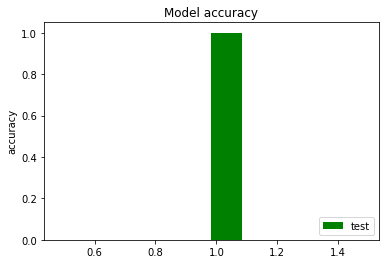

In [41]:
import matplotlib.pyplot as plt
plt.hist(nb.score(X_train, y_train),color = 'green')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.legend(['test', 'test'], loc='lower right')
plt.show()

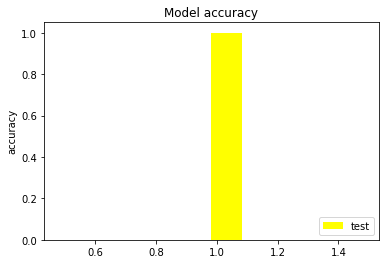

In [42]:
import matplotlib.pyplot as plt
plt.hist(clf.score(X_train,y_train),color = 'yellow')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.legend(['test', 'test'], loc='lower right')
plt.show()

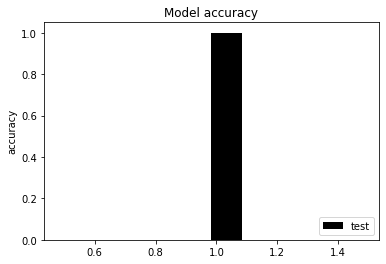

In [43]:
import matplotlib.pyplot as plt
plt.hist(neigh.score(X_train,y_train),color='black')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.legend(['test', 'test'], loc='lower right')
plt.show()

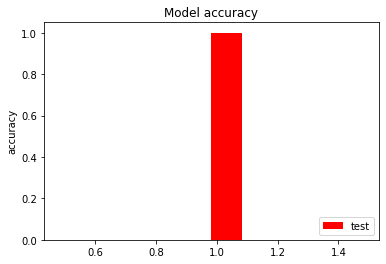

In [44]:
import matplotlib.pyplot as plt
plt.hist(model.score(X_train,y_train),color = 'red')
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.legend(['test', 'test'], loc='lower right')
plt.show()

KNN: 0.983871 (0.003802)
NB: 0.980011 (0.005313)


C:\Users\Rakib\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC: 0.983871 (0.003802)
GB: 0.980150 (0.005084)


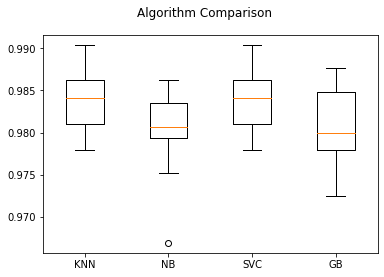

In [49]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', MultinomialNB()))
models.append(('SVC', SVC()))
models.append(('GB', GradientBoostingClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()